<a href="https://colab.research.google.com/github/Anupa-123/Bike-sharing-demand-prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [34]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')



**Mount the drive and import the dataset.**

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
#Reading csv file
data= pd.read_csv("/content/drive/MyDrive/SeoulBikeData.csv", encoding = "ISO-8859-1")

**Understand more abount the data.**

In [37]:
# Copy the data for backup
df = data.copy()

In [38]:
# Checking of records of the dataframe
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [39]:
# Checking bottom records in the dataframe
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [40]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

**Rename Columns**

In [41]:
df.rename(columns={'Rented Bike Count': 'Rented_Bike_Count','Wind speed (m/s)':'WindSpeed','Visibility (10m)':'Visibility',
 'Dew point temperature(°C)': 'Dew_Point_Temperature', 'Solar Radiation (MJ/m2)':'Solar_Radiation','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall',
 'Functioning Day':'Functioning_Day','Temperature(°C)':'Temperature','Humidity(%)':'Humidity'}, inplace=True)

In [42]:
df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [43]:
df.Holiday.value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [44]:
df.Functioning_Day.value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [45]:
# Data shape
df.shape

(8760, 14)

The dataset contains 8760 rows and 14 columns.

In [46]:
# Change The datatype of Date columns to extract 'Month' ,'Day', "year". so  further we can analyze the Bike rentals with respect to year months and days.
df['Date']= df['Date'].astype('datetime64[ns]')

In [47]:
# Creating new columns 'Month', 'Year' ,'Day.
df['Month']=df['Date'].dt.month

 #dt.day_name() and dt.month_name()  will give day names and month names
# dt.month will give month numbers as 1,2,3,...12

df['Day']=df['Date'].dt.day_name()                 
                                                          

In [48]:
#  Creating new column and Encoding with 1 if its weekend and 0 if its Weekdays.
df['Weekdays_or_weekend']=df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)


In [49]:
# Now We can Drop Day and Date columns.
df.drop(['Date',"Day"],axis=1 ,inplace=True)

In [50]:
# data dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   WindSpeed              8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_Point_Temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  Month                  8760 non-null   int64  
 14  Weekdays_or_weekend    8760 non-null   int64  
dtypes: f

In [51]:
df.describe()

,Rented_Bike_Count,Hour,Temperature,Humidity,WindSpeed,Visibility,Dew_Point_Temperature,Solar_Radiation,Rainfall,Snowfall,Month,Weekdays_or_weekend
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,0.290411
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,0.453978
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,1.000000


In [52]:
# Statistical info 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented_Bike_Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
WindSpeed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew_Point_Temperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar_Radiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [53]:
# Print the unique values
df.nunique()

Rented_Bike_Count        2166
Hour                       24
Temperature               546
Humidity                   90
WindSpeed                  65
Visibility               1789
Dew_Point_Temperature     556
Solar_Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning_Day             2
Month                      12
Weekdays_or_weekend         2
dtype: int64

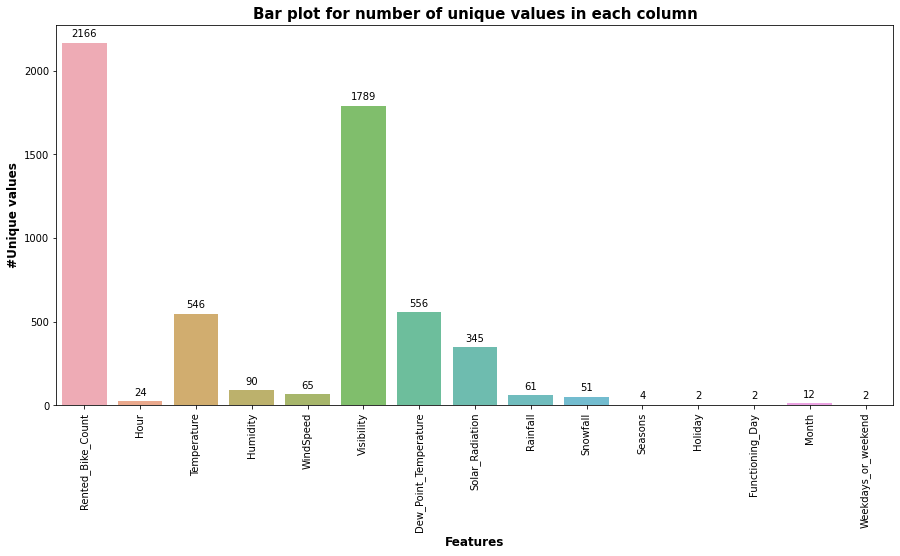

In [54]:
# Unique Values in each column
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

**Basic cleaning of the data**

**Misssing Values**





In [55]:
# Checking null values of data 
df.isna().sum()

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
WindSpeed                0
Visibility               0
Dew_Point_Temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Month                    0
Weekdays_or_weekend      0
dtype: int64

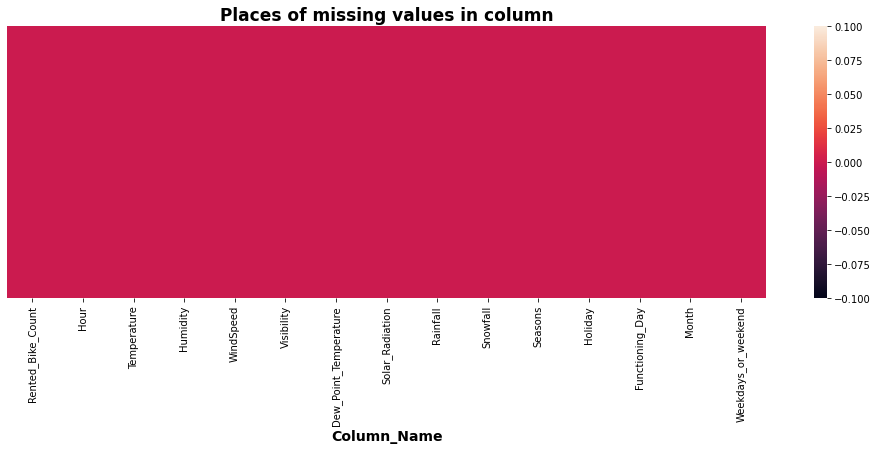

In [56]:
# No missin Values in our dataset
plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

**Duplicate Values**

In [57]:
# Checking duplicate
df.duplicated().sum()

0

As we can see in the above data there is no missng and duplicate value.

**Handling outliers**

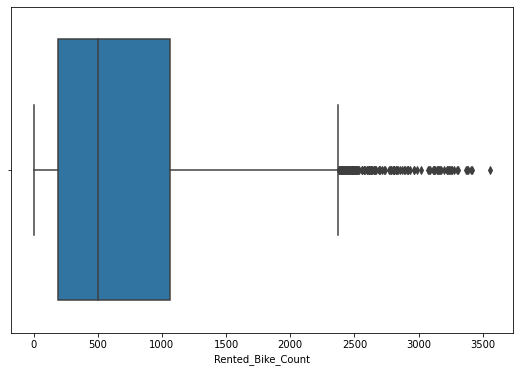

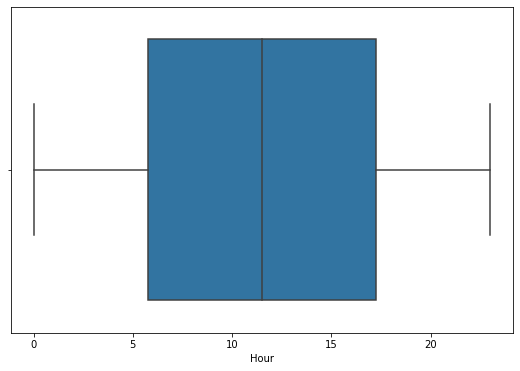

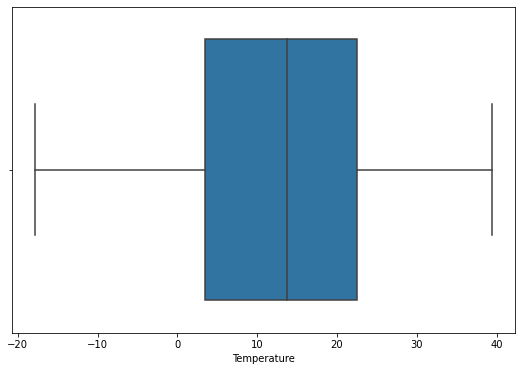

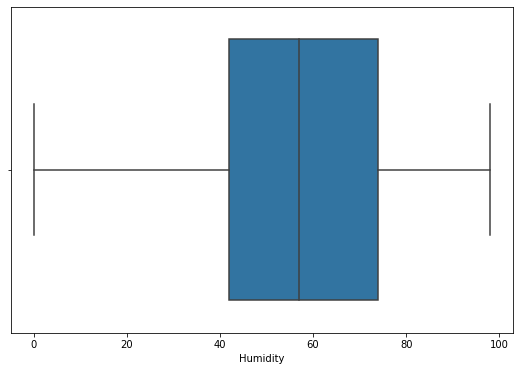

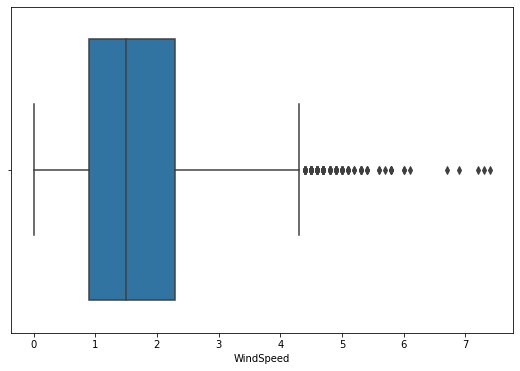

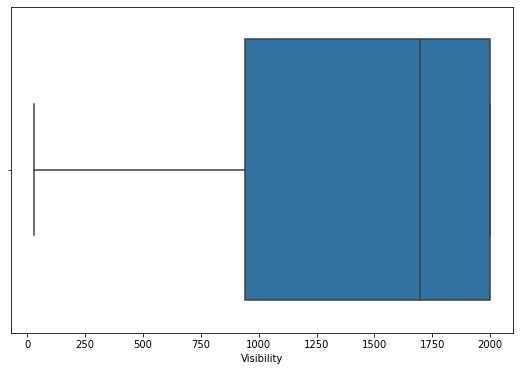

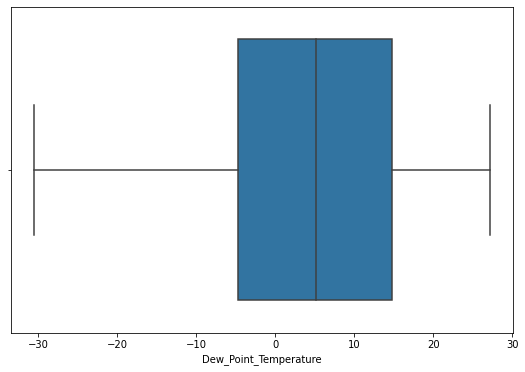

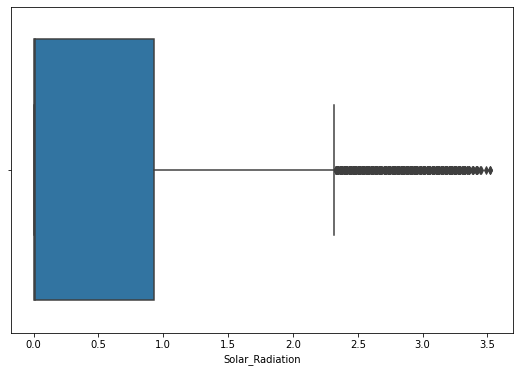

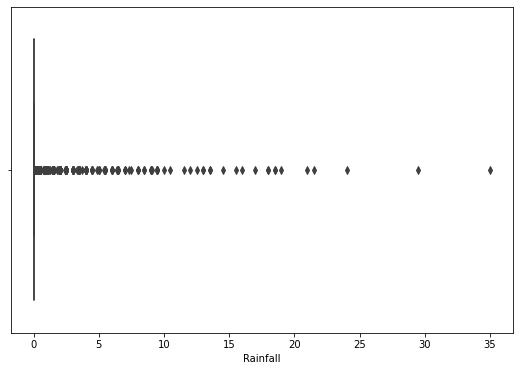

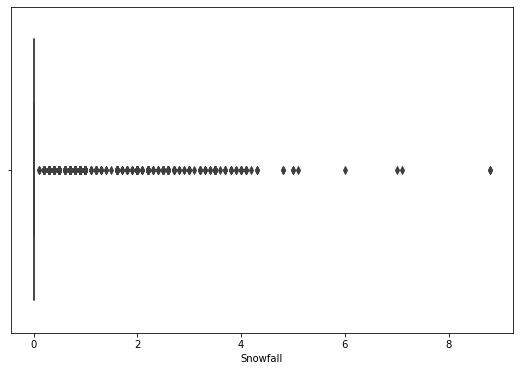

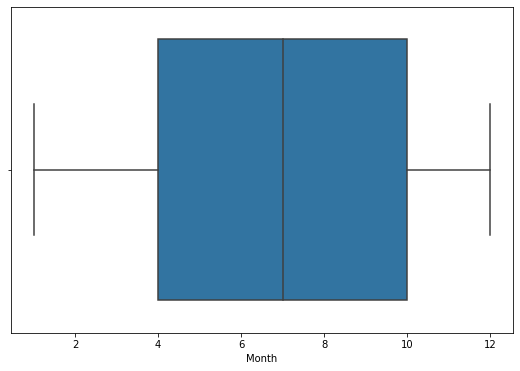

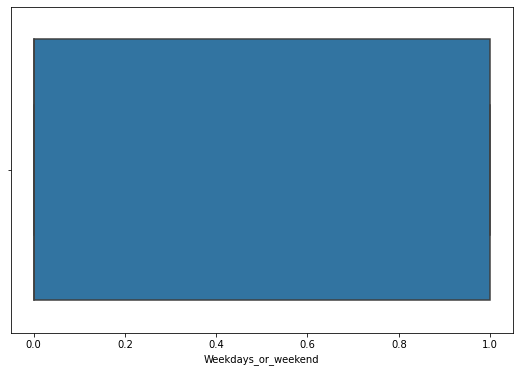

In [58]:
# create numeric columns list.
numeric_columns=df.describe().columns.tolist()
numeric_columns

# create categorical column list
categorical_columns= list(set(df.columns) - set(df.describe().columns))
categorical_columns

# priting box plot of numeric columns to check oultliers
for columns in numeric_columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(x=df[columns])

**Exploratory data analysis(EDA)**

When we observe the data we realize that Hour column is a numerical column but it is a time stamp so we have to treat Hour as a categorical feature.

In [59]:
# convert Hour column integer to Categorical 
df['Hour']=df['Hour'].astype('object')

In [60]:
# Divide Data in categorical and numerical features
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [61]:
numeric_features.head()

,Rented_Bike_Count,Temperature,Humidity,WindSpeed,Visibility,Dew_Point_Temperature,Solar_Radiation,Rainfall,Snowfall,Month,Weekdays_or_weekend
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0


In [62]:
categorical_features.head()

,Hour,Seasons,Holiday,Functioning_Day
0,0,Winter,No Holiday,Yes
1,1,Winter,No Holiday,Yes
2,2,Winter,No Holiday,Yes
3,3,Winter,No Holiday,Yes
4,4,Winter,No Holiday,Yes


**Univariate Analysis**

In this we'll just focus on the dependent variable,a dependent variable is a variable whose value will change depending on the value of another variable.
 

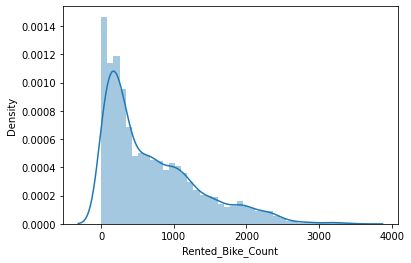

In [63]:
#visualising distribution

sns.distplot(df['Rented_Bike_Count'])

**Bike rented trend according to hour**

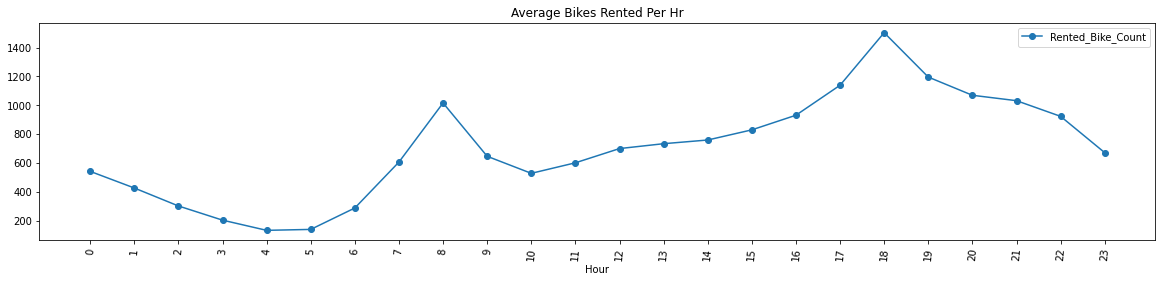

In [64]:
#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = df.groupby('Hour')['Rented_Bike_Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);

We can clearly see that high rise of Rented Bikes from 8:00 a.m to 9:00 p.m means people prefer rented bike during rush hour.

**Bike rented trend according to month**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

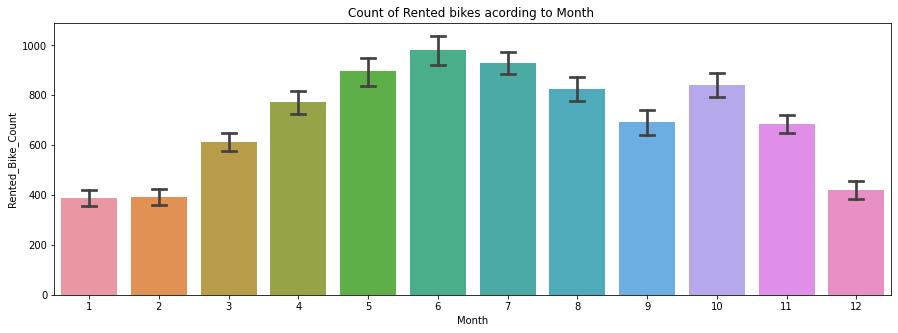

In [65]:
#Monthly trend of bike demand
fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(data=df,x='Month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

Above barplot shows that from March Bike Rent Count started increasing and it was highest in June.

**Bike rented trend according to season**

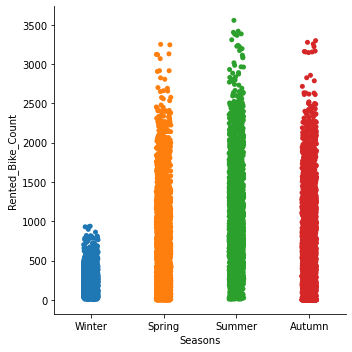

In [67]:
# Trend of bike according to seasons
sns.catplot(x='Seasons',y='Rented_Bike_Count',data=df)

We can clearly see that there is less demand of rented bike during winter season and high demand in summer season.

**Bivariate Analysis**

[Text(0.5, 1.0, 'Count of bikes during different days')]

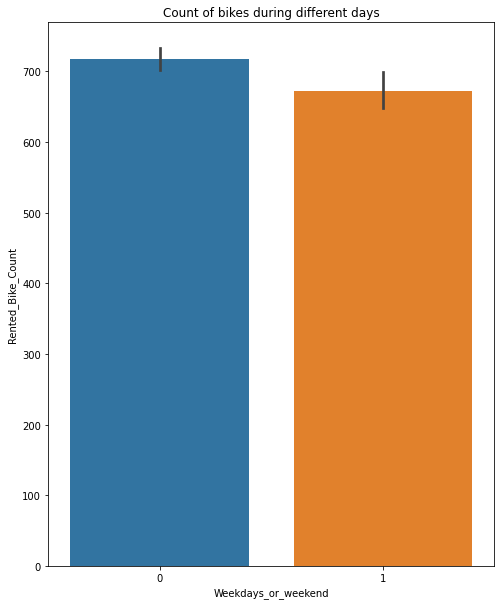

In [66]:
fig, ax = plt.subplots(figsize=(8,10))
sns.barplot(data=df, x='Weekdays_or_weekend', y='Rented_Bike_Count', ax=ax)
ax.set(title='Count of bikes during different days')

**Bike rented according to hour on weekdays or on weekend**

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Holiday / No Holiday')

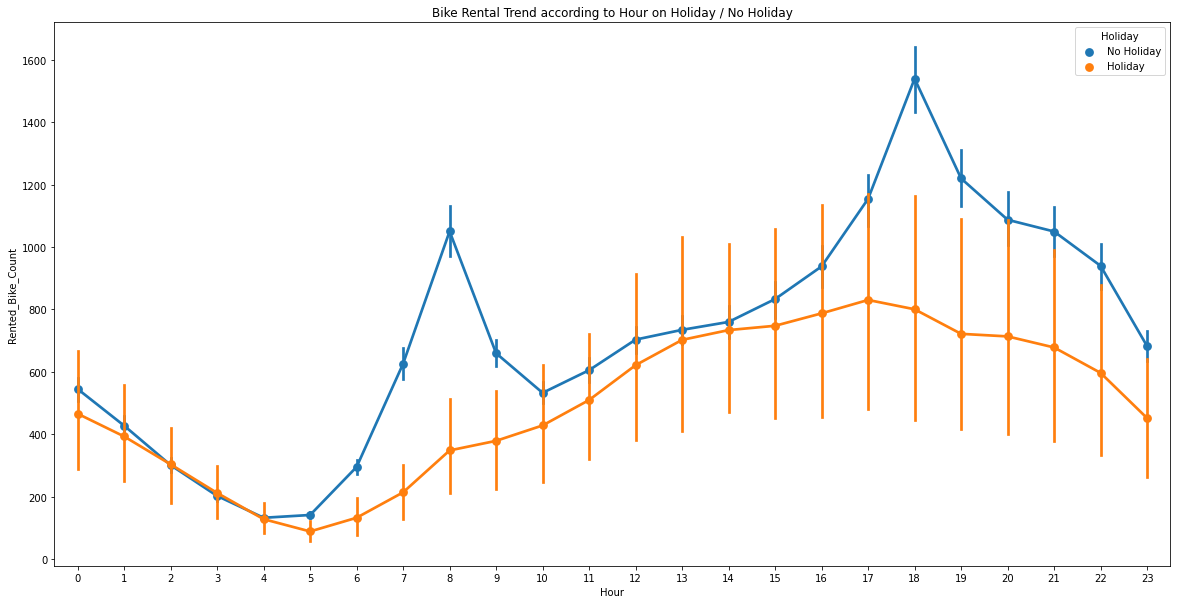

In [68]:
# Bike Rental trend with respect to Hour on Holiday or No Holiday.
plt.figure(figsize=(20,10))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['Holiday'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")

We can observe from the above plot that there is sudden peak between 6/7AM to 10 AM.
Office time,College and going time could be the reason for this sudden peak (Weekdays). But on Weekend the case is different less bike rentals happend.

Again there is peak between 10 AM to 7 PM. may be its office leaving time for the above people.(Weekdays).

**Bike rentel trend according to functioning day**

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Functioning day')

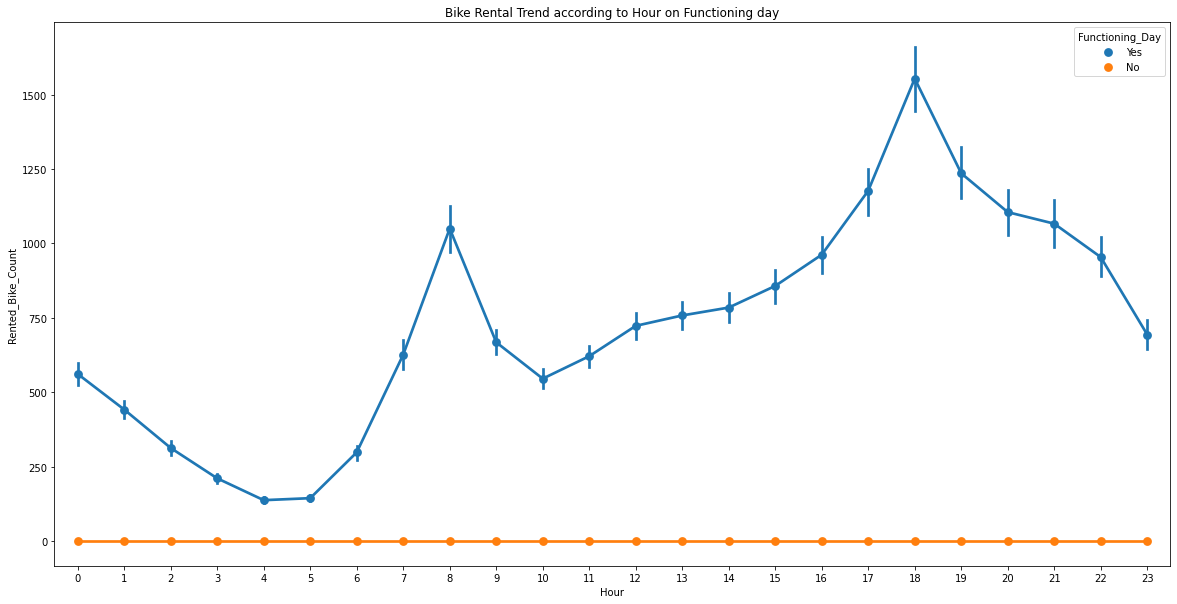

In [69]:
#Bike Rental trend with respect to Hour on Functioning day.
plt.figure(figsize=(20,10))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['Functioning_Day'])
plt.title("Bike Rental Trend according to Hour on Functioning day")

Here the trend for functioning day is same as of Weekdays. Only the difference is on No functioning day there is no bike rentals.